In [1]:
from dataset import sphere_dataset
from matplotlib.pyplot import imshow
import util

dataset = sphere_dataset('data', 10)
d = dataset[15]
util.imshow(d['x2'].permute(1,2,0), (1,1))
util.imshow(d['x1'].permute(1,2,0), (1,1))
util.imshow(d['y'])
print(d['yidx'])

tensor([ 8, 10])


In [3]:
import torch
d = dataset[15]
y = d['y'].unsqueeze(0)
yT = torch.transpose(y,1,2)

d = dataset[15]
y2 = d['y'].unsqueeze(0)
y2T = torch.transpose(y2,1,2)

#util.imshow(y.squeeze(0))
#util.imshow(y2.squeeze(0))
(y[0,0] * y2[0,0].T).sum(), (y[0,0]**2).sum()

(tensor(0.), tensor(0.2734))

In [4]:
x = y[0,0]
X = torch.stack( [x,x,x])
print(X.shape, X.T.shape)
torch.matmul(X,X.T)

torch.Size([3, 21]) torch.Size([21, 3])


tensor([[0.2734, 0.2734, 0.2734],
        [0.2734, 0.2734, 0.2734],
        [0.2734, 0.2734, 0.2734]])

In [100]:
from spose_model import spose_model
import torch

model = spose_model()
model.load_state_dict( torch.load('model24.pth') )
model = model.cuda()
model.eval()
1

1

tensor([20, 18])
19 8


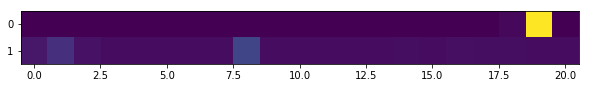

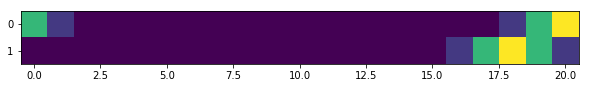

In [160]:
from random import randrange
i = randrange(len(dataset))
d = dataset[i]
print(d['yidx'] )
A,B = d['x1'].unsqueeze(0).cuda(), d['x2'].unsqueeze(0).cuda()
py = model(A,B)
util.imshow(py.squeeze(0).detach().cpu())
util.imshow(d['y'])
print(torch.argmax(py.squeeze(0)[0:1]).item(), torch.argmax(py.squeeze(0)[1:2]).item() )

In [52]:
from torch import diag, matmul
def F(a,b):
    return diag( matmul(a,b.T) ).sum()
def loss(py,y):
    py1,y1 = py[:, 0], y[:, 0]
    py2,y2 = py[:, 1], y[:, 1]
    #l1 = torch.bmm(py1,y1).sum() + torch.bmm(py1,py1)
    #l2 = torch.bmm(py2,y2).sum() + torch.bmm(py2,py2)
    l1 = -F(py1,y1) + F(py1,py1)
    l2 = -F(py2,y2) + F(py2,py2)
    return l1+l2

A = py
B = d['y'].unsqueeze(0).cuda()
loss(A,B)


tensor(0.0267, device='cuda:0', grad_fn=<AddBackward0>)

In [13]:
d['x1'].min()

tensor(0.)

In [38]:
torch.argmax(py.squeeze(0)[1:2] )

tensor(15, device='cuda:0')

In [12]:
def imshw(x):
    imshow(x)

In [57]:
lyr(A)[0,:].sum()

tensor(2.0000)

In [5]:
d['yidx']

[10, 48]